# EDA for Fruit Image Classification Dataset
Performing an exploratory data analysis (EDA) on the dataset consisting of images of three types of fruits: tomato, cherry, and strawberry.

## Step 1: Load and Inspect Dataset

In [2]:

import os
import cv2
import matplotlib.pyplot as plt

# Set the path to the local directory where images are stored
dataset_path = 'train_data'
classes = ['tomato', 'cherry', 'strawberry']

# Display the count of images per class
for fruit_class in classes:
    folder_path = os.path.join(dataset_path, fruit_class)
    count = len(os.listdir(folder_path))
    print(f"{fruit_class.capitalize()} images: {count}")


Tomato images: 1495
Cherry images: 1496
Strawberry images: 1495


## Step 2: Display Sample Images

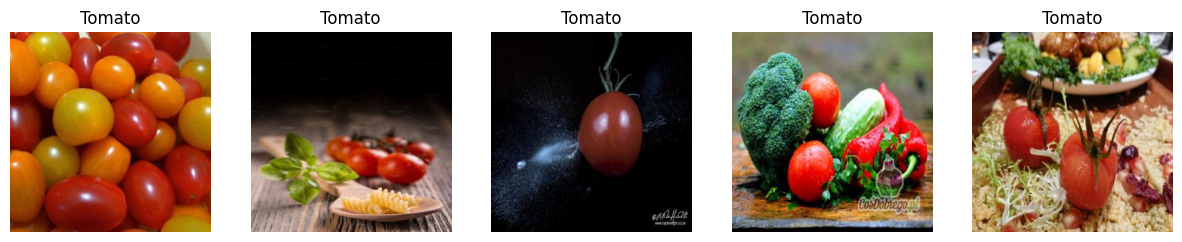

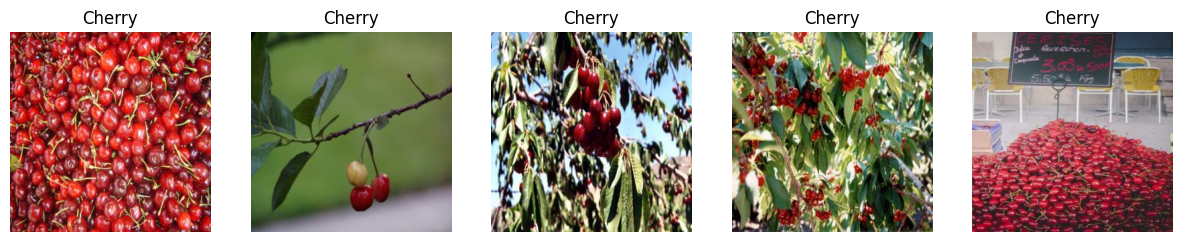

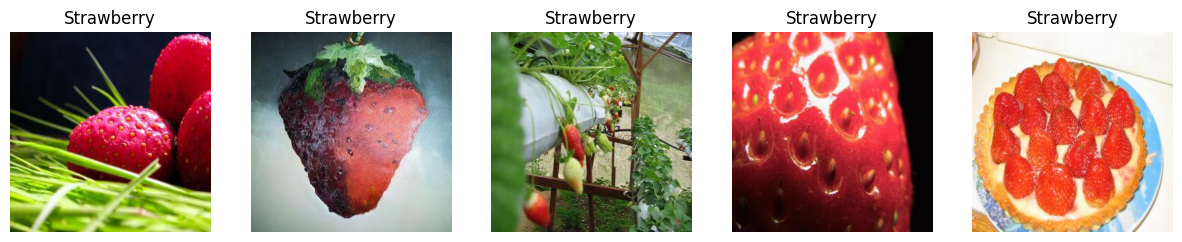

In [3]:

def display_images(class_name, num_images=5):
    folder_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:num_images]
    fig, ax = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image is loaded successfully
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[i].imshow(img)
            ax[i].axis('off')
            ax[i].set_title(class_name.capitalize())
        else:
            print(f"Warning: {img_path} could not be loaded.")
    plt.show()

# Display 5 images from each class
for fruit_class in classes:
    display_images(fruit_class)


## Step 3: Image Property Analysis

Tomato - Mean Resolution: [300. 300.]
Tomato - Mean Color: [ 85.99248178 109.885934   143.34624622]
Cherry - Mean Resolution: [300. 300.]
Cherry - Mean Color: [ 90.03925556 104.78831723 146.09785306]
Strawberry - Mean Resolution: [295.44 296.12]
Strawberry - Mean Color: [ 94.90407333 110.14241539 150.94030153]


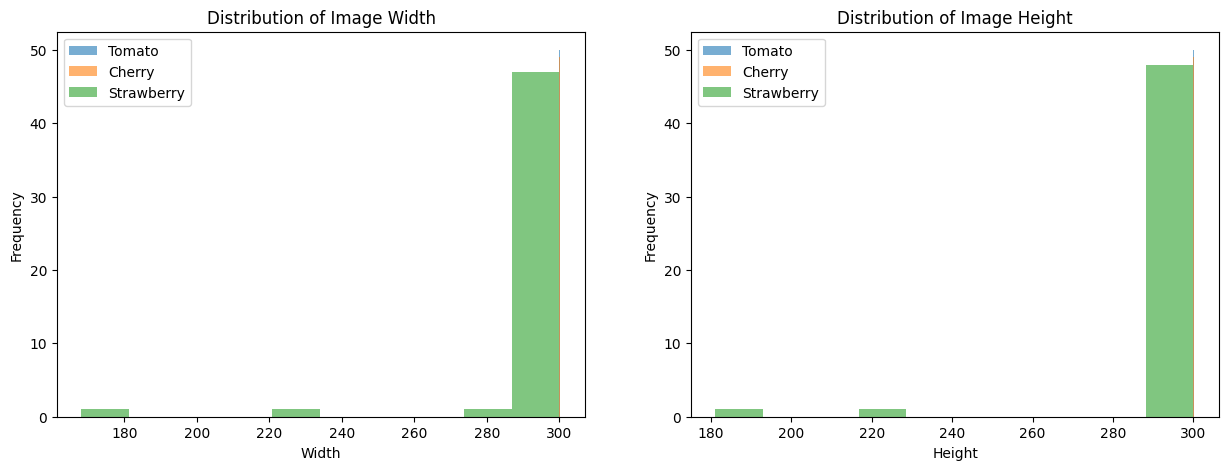

In [4]:

import numpy as np

def analyze_image_properties(class_name, num_samples=50):
    folder_path = os.path.join(dataset_path, class_name)
    images = os.listdir(folder_path)[:num_samples]
    resolutions = []
    color_means = []
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image is loaded successfully
            resolutions.append(img.shape[:2])
            color_means.append(np.mean(img, axis=(0, 1)))
        else:
            print(f"Warning: {img_path} could not be loaded.")
    return resolutions, color_means

# Analyze properties for each class
properties = {}
for fruit_class in classes:
    properties[fruit_class] = analyze_image_properties(fruit_class)
    print(f"{fruit_class.capitalize()} - Mean Resolution: {np.mean(properties[fruit_class][0], axis=0)}")
    print(f"{fruit_class.capitalize()} - Mean Color: {np.mean(properties[fruit_class][1], axis=0)}")


# Display the distribution of image resolutions

def plot_resolution_distribution(properties):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for i, prop in enumerate(['width', 'height']):
        for fruit_class in classes:
            resolutions = properties[fruit_class][0]
            values = [res[i] for res in resolutions]
            ax[i].hist(values, alpha=0.6, label=fruit_class.capitalize())
        ax[i].set_title(f'Distribution of Image {prop.capitalize()}')
        ax[i].set_xlabel(prop.capitalize())
        ax[i].set_ylabel('Frequency')
        ax[i].legend()
    plt.show()

plot_resolution_distribution(properties)


# Display the distribution of image color means

def plot_color_distribution(properties):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        for fruit_class in classes:
            color_means = properties[fruit_class][1]
            values = [mean[i] for mean in color_means]
            ax[i].hist(values, alpha=0.6, label=fruit_class.capitalize())
        ax[i].set_title(f'Distribution of {color.capitalize()} Channel')
        ax[i].set_xlabel('Intensity')
        ax[i].set_ylabel('Frequency')
        ax[i].legend()
    plt.show()

plot_color_distribution(properties)


## Step 4: Visualize RGB Color Distributions

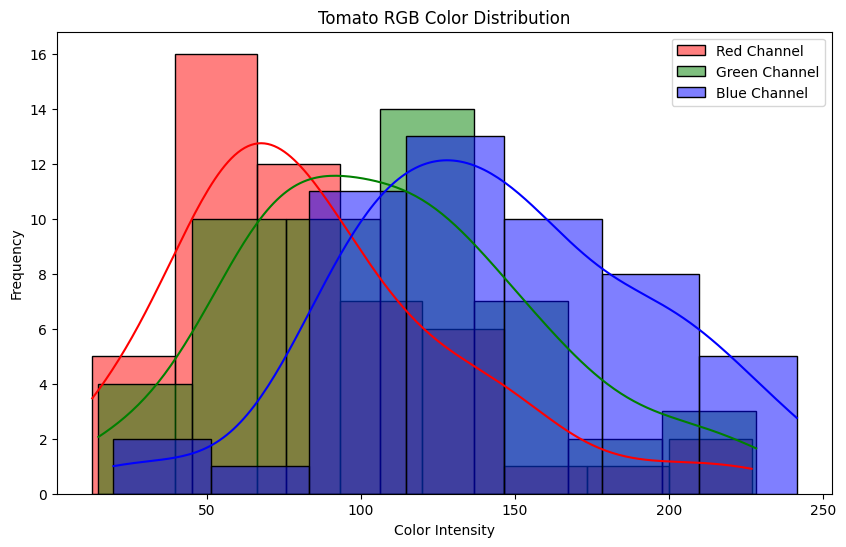

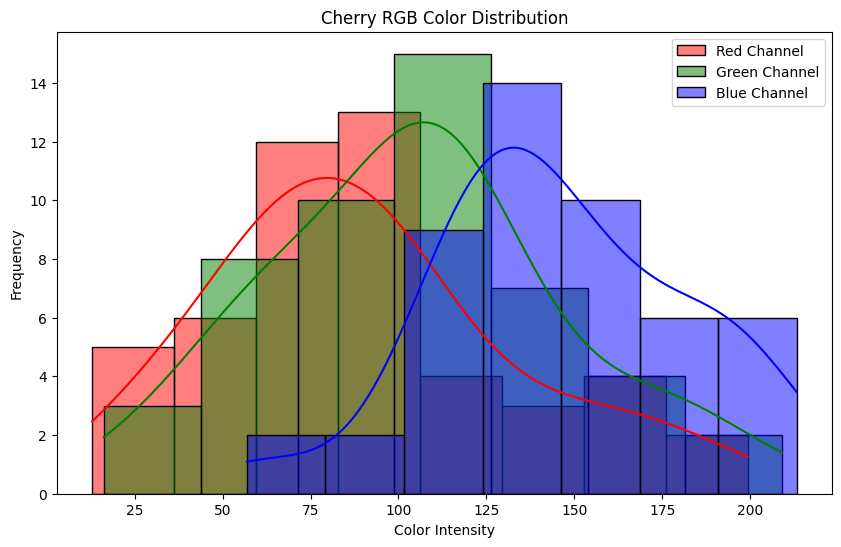

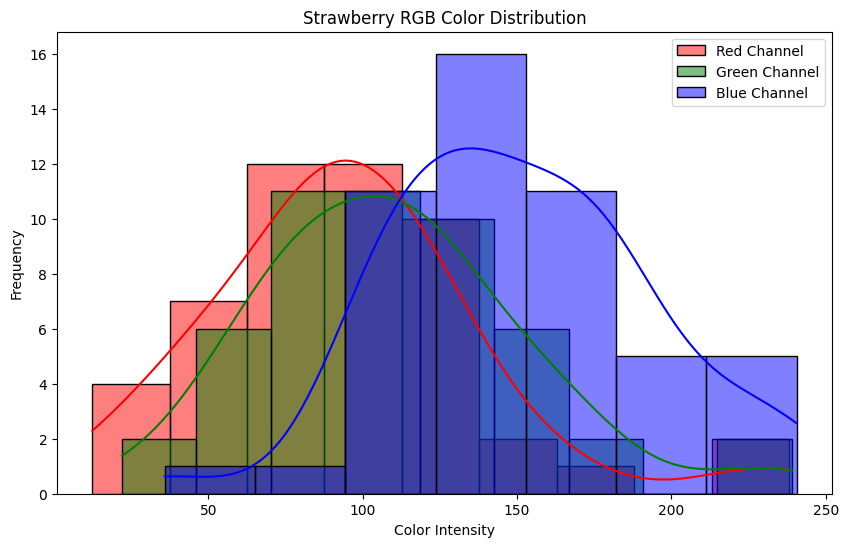

In [5]:

import seaborn as sns

# Plotting color distributions for each class
for fruit_class in classes:
    color_data = np.array(properties[fruit_class][1])
    plt.figure(figsize=(10, 6))
    sns.histplot(color_data[:, 0], color='red', kde=True, label='Red Channel')
    sns.histplot(color_data[:, 1], color='green', kde=True, label='Green Channel')
    sns.histplot(color_data[:, 2], color='blue', kde=True, label='Blue Channel')
    plt.title(f'{fruit_class.capitalize()} RGB Color Distribution')
    plt.legend()
    plt.xlabel('Color Intensity')
    plt.ylabel('Frequency')
    plt.show()


# Step 5: Resize image dimensions

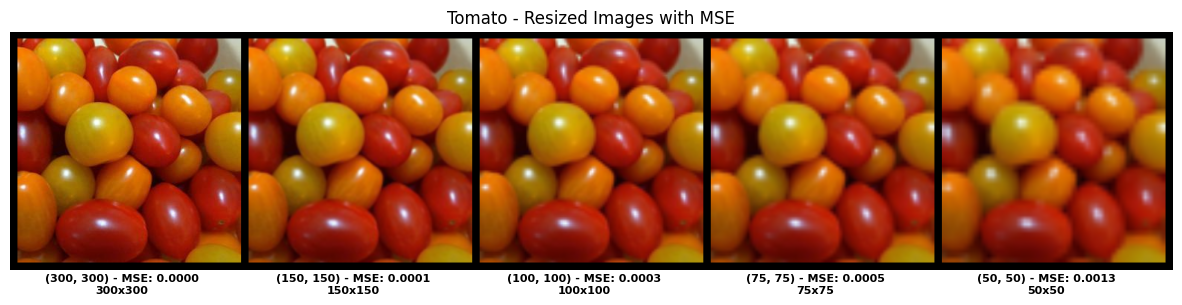

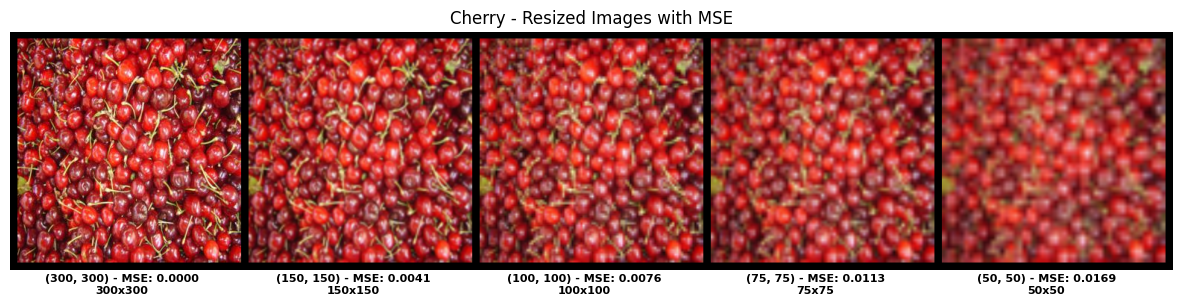

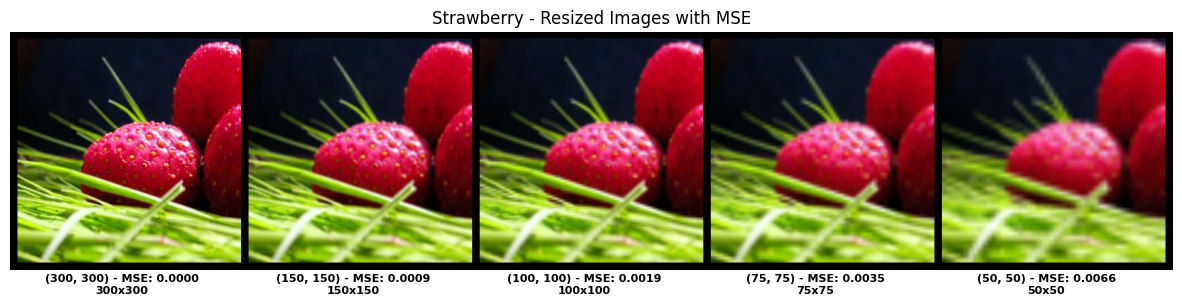

In [6]:
import torch
from torchvision.transforms import ToTensor, functional as F
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the folder structure and class names
dataset_path = 'train_data'
classes = ['tomato', 'cherry', 'strawberry']
sizes = [(300, 300), (150, 150), (100,100), (75, 75), (50,50)]  # Define sizes for resizing

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original, resized):
    """Calculate the Mean Squared Error between the original and resized images."""
    return torch.mean((original - resized) ** 2).item()

# Loop through each class and process a sample image
for fruit_class in classes:
    folder_path = os.path.join(dataset_path, fruit_class)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_path = os.path.join(folder_path, image_files[0])  # Take the first image for example
    original_image = Image.open(image_path)
    original_tensor = ToTensor()(original_image.resize(sizes[0]))  # Resize to max size for consistency

    resized_images = []
    mse_values = []
    
    # Resize each image and calculate MSE with the original
    for size in sizes:
        resized_image = original_image.resize(size)
        resized_tensor = ToTensor()(resized_image)
        
        # Resize back to max size for MSE comparison
        resized_back = F.resize(resized_tensor, sizes[0])
        mse = calculate_mse(original_tensor, resized_back)
        mse_values.append((size, mse))
        
        resized_images.append(resized_back)
    
    # Create a grid of resized images
    grid = make_grid(resized_images, nrow=len(sizes), padding=10)
    
    # Plot the grid with annotations
    plt.figure(figsize=(15, 5))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title(f"{fruit_class.capitalize()} - Resized Images with MSE")
    plt.axis("off")
    
    # Add size and MSE annotations
    for idx, (size, mse) in enumerate(mse_values):
        x_pos = (idx * (sizes[0][0] + 10)) + sizes[0][0] // 2  # Center annotation below each image
        y_pos = sizes[0][1] + 50  # Position below each image
        plt.text(x_pos, y_pos, f"{size} - MSE: {mse:.4f}\n{size[0]}x{size[1]}", 
                 ha='center', color='black', fontsize=8, weight='bold')

    plt.show()
